### Customer Sentiment analysis on customer reviews

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('data_set_2.csv')  
data.dropna(inplace=True) 

In [3]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [4]:
data.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19662 entries, 2 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               19662 non-null  int64 
 1   Clothing ID              19662 non-null  int64 
 2   Age                      19662 non-null  int64 
 3   Title                    19662 non-null  object
 4   Review Text              19662 non-null  object
 5   Rating                   19662 non-null  int64 
 6   Recommended IND          19662 non-null  int64 
 7   Positive Feedback Count  19662 non-null  int64 
 8   Division Name            19662 non-null  object
 9   Department Name          19662 non-null  object
 10  Class Name               19662 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.8+ MB


In [6]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000
mean,11755.260655,921.297274,43.260808,4.183145,0.818177,2.652477
std,6772.063092,200.227528,12.258122,1.112224,0.385708,5.834285
min,2.000000,1.000000,18.000000,1.000000,0.000000,0.000000
25%,5888.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11749.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17624.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [7]:
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [8]:
data.shape

(19662, 11)

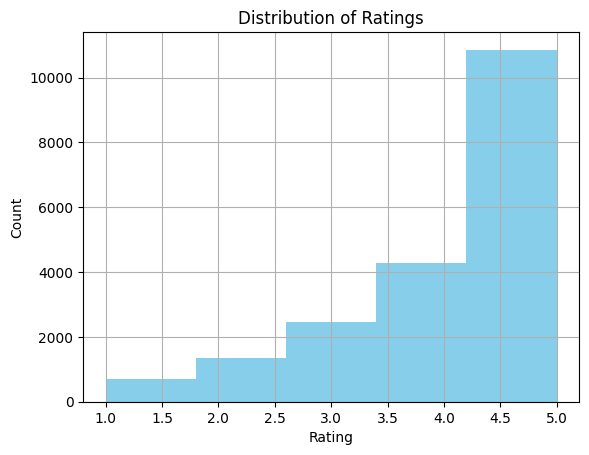

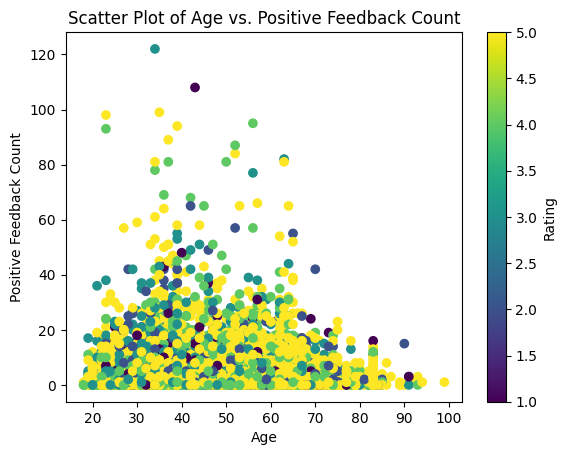

<Figure size 800x600 with 0 Axes>

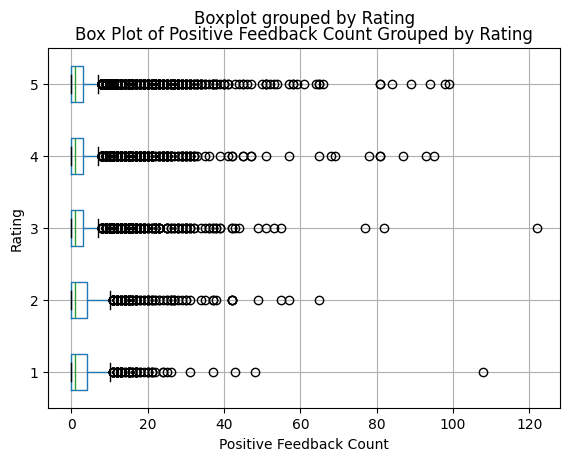

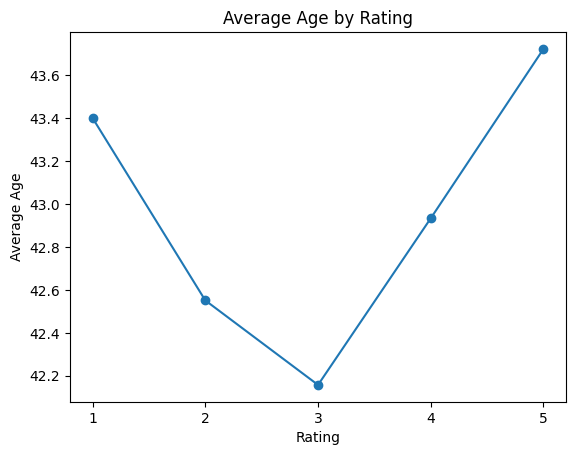

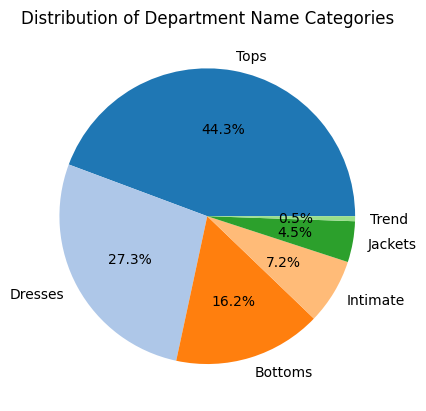

   Rating        Age  Positive Feedback Count
0       1  43.399421                 3.366136
1       2  42.550735                 3.384559
2       3  42.157468                 3.183847
3       4  42.932851                 2.570996
4       5  43.720851                 2.426966


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' contains the Women's E-Commerce Clothing Reviews dataset

# Histogram of ratings
data['Rating'].hist(bins=5, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

# Scatter plot of 'Age' vs. 'Positive Feedback Count'
plt.scatter(data['Age'], data['Positive Feedback Count'], c=data['Rating'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Positive Feedback Count')
plt.title('Scatter Plot of Age vs. Positive Feedback Count')
plt.colorbar(label='Rating')
plt.show()

# Box plot of 'Positive Feedback Count' grouped by 'Rating'
plt.figure(figsize=(8, 6))
data.boxplot(column='Positive Feedback Count', by='Rating', vert=False)
plt.xlabel('Positive Feedback Count')
plt.ylabel('Rating')
plt.title('Box Plot of Positive Feedback Count Grouped by Rating')
plt.show()

# Line graph showing the average 'Age' for each 'Rating' level
avg_age_by_rating = data.groupby('Rating')['Age'].mean()
plt.plot(avg_age_by_rating.index, avg_age_by_rating.values, marker='o')
plt.xlabel('Rating')
plt.ylabel('Average Age')
plt.title('Average Age by Rating')
plt.xticks(data['Rating'].unique())  # Make sure x-axis ticks match the unique rating levels
plt.show()

# Pie chart showing the distribution of 'Department Name' categories
dept_counts = data['Department Name'].value_counts()
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Distribution of Department Name Categories')
plt.show()

# Creating a table to display summary statistics by 'Rating'
summary_table = data.groupby('Rating').agg({
    'Age': 'mean',
    'Positive Feedback Count': 'mean'
}).reset_index()

print(summary_table)


In [10]:
data.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [11]:
data['Positive Feedback Count'].value_counts

<bound method IndexOpsMixin.value_counts of 2         0
3         0
4         6
5         4
6         1
         ..
23481     0
23482     0
23483     1
23484     2
23485    22
Name: Positive Feedback Count, Length: 19662, dtype: int64>

In [12]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

In [ ]:
data.groupby('Rating').mean()

In [ ]:
X = data.drop('Positive Feedback Count',axis=1)
y = data['Positive Feedback Count']

In [ ]:
X=data['Positive Feedback Count']
y=data['Rating']

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
import numpy as np

# Assuming X and y are your Pandas Series
X = X.values.reshape(-1, 1)  # Convert to NumPy array and reshape
y = y.values.reshape(-1, 1)  # Convert to NumPy array and reshape

In [ ]:
y

In [ ]:
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

In [ ]:
# Dictionary to store evaluation metrics for each model
evaluation_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

In [ ]:
X = X.reshape(-1, 1)  # Reshape X to have one column
y = y.reshape(-1, 1)  # Reshape y to have one column

In [ ]:
y = np.ravel(y)
y = y.reshape(-1,)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X and y are your data and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    # Cross-validation to get more robust performance estimate
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
    mean_accuracy = cv_scores.mean()
    
    # Fit the model on the full training set and make predictions on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store evaluation metrics in the dictionary
    evaluation_metrics['Model'].append(name)
    evaluation_metrics['Accuracy'].append(accuracy)
    evaluation_metrics['Precision'].append(precision)
    evaluation_metrics['Recall'].append(recall)
    evaluation_metrics['F1-score'].append(f1)
    
    print(f"{name} Mean Cross-Validation Accuracy: {mean_accuracy:.2f}")
    print(f"{name} Test Accuracy: {accuracy:.2f}")
    print(f"{name} Test Precision: {precision:.2f}")
    print(f"{name} Test Recall: {recall:.2f}")
    print(f"{name} Test F1-score: {f1:.2f}")
    print("=" * 50)

In [ ]:
metrics_df = pd.DataFrame(evaluation_metrics)
print(metrics_df)

In [ ]:
best_model_name = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Model']
print(f"Best-Performing Model: {best_model_name}")

### Conclusions¶
Women Between 35 - 55 of Age are Big Buyers and also giving good reviews and ratings.

We should target this age group to increase sales.

Women of Age between 35 - 55 having more money and more purchasing power than young and Old aged Women.